In [26]:
import pandas as pd

# Load the dataset
data = pd.read_csv('CSCS_data_anon.csv')

# Print the original unique values (for inspection)
print("Original unique values in 'CONNECTION_social_time_neighbours_p7d_grouped':")
print(data['CONNECTION_social_time_neighbours_p7d_grouped'].unique())

# Define the replacement rules
replace_dict = {
    '5 or more hours': 3,
    '1 to 4 hours': 2,
    'Less than 1 hour': 1,
    'No time': 0,
    'Presented but no response': None,  # Convert to missing values
    'NAN': None,  # If the dataset uses 'NAN' as a string
    'nan': None,  # If the dataset uses lowercase 'nan' as a string
}

# Replace categorical variables with numerical values
data['CONNECTION_social_time_neighbours_p7d_grouped'] = data['CONNECTION_social_time_neighbours_p7d_grouped'].replace(replace_dict)

# Ensure consistent handling of missing values
# Convert any remaining unrecognized or invalid values to NaN
data['CONNECTION_social_time_neighbours_p7d_grouped'] = pd.to_numeric(data['CONNECTION_social_time_neighbours_p7d_grouped'], errors='coerce')

# Print unique values after replacement
print("\nAfter replacement, unique values in 'CONNECTION_social_time_neighbours_p7d_grouped':")
print(data['CONNECTION_social_time_neighbours_p7d_grouped'].unique())

# Handle missing values
# Option 1: Drop rows with missing values
data_cleaned = data[['WELLNESS_life_satisfaction', 'CONNECTION_social_time_neighbours_p7d_grouped']].dropna()

# Option 2: (Optional) Fill missing values with a meaningful value, e.g., mode
# mode_value = data['CONNECTION_social_time_neighbours_p7d_grouped'].mode()[0]
# data['CONNECTION_social_time_neighbours_p7d_grouped'].fillna(mode_value, inplace=True)

# Print missing value information
print(f"\nMissing values in 'CONNECTION_social_time_neighbours_p7d_grouped' after cleaning: {data_cleaned['CONNECTION_social_time_neighbours_p7d_grouped'].isna().sum()}")

# Check the cleaned dataset
print("\nData after cleaning:")
print(data_cleaned.head())
print("\nData types of cleaned columns:")
print(data_cleaned.dtypes)

# Verify ranges of the cleaned columns
print("\nRanges of the cleaned columns:")
print("CONNECTION_social_time_neighbours_p7d_grouped range: ", 
      data_cleaned['CONNECTION_social_time_neighbours_p7d_grouped'].min(), "to", 
      data_cleaned['CONNECTION_social_time_neighbours_p7d_grouped'].max())
print("WELLNESS_life_satisfaction range: ", 
      data_cleaned['WELLNESS_life_satisfaction'].min(), "to", 
      data_cleaned['WELLNESS_life_satisfaction'].max())


/tmp/ipykernel_52/4013762465.py:4: DtypeWarning: Columns (408,1001,1002,1006,1007,1008,1080,1113,1115,1116,1117,1118,1119,1120,1121,1124,1125,1126,1127,1128,1213,1214,1215,1216,1217,1218,1342,1343,1344,1345,1346,1347,1348,1349,1390,1391,1393,1463,1549,1552,1555,1558,1561) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CSCS_data_anon.csv')


Original unique values in 'CONNECTION_social_time_neighbours_p7d_grouped':
['Less than 1 hour' '1 to 4 hours' 'No time' nan '5 or more hours'
 'Presented but no response']

After replacement, unique values in 'CONNECTION_social_time_neighbours_p7d_grouped':
[ 1.  2.  0. nan  3.]

Missing values in 'CONNECTION_social_time_neighbours_p7d_grouped' after cleaning: 0

Data after cleaning:
   WELLNESS_life_satisfaction  CONNECTION_social_time_neighbours_p7d_grouped
0                         2.0                                            1.0
1                         7.0                                            1.0
2                         5.0                                            1.0
3                         4.0                                            1.0
4                         8.0                                            2.0

Data types of cleaned columns:
WELLNESS_life_satisfaction                       float64
CONNECTION_social_time_neighbours_p7d_grouped    float64
dtype

In [27]:
import statsmodels.formula.api as smf

# Fit a linear regression model
model = smf.ols('WELLNESS_life_satisfaction ~ CONNECTION_social_time_neighbours_p7d_grouped', data=data_cleaned).fit()

# Print regression summary
print("Regression Summary:")
print(model.summary())

# Extract the estimated slope (β1) and intercept (β0)
beta_1_hat = model.params['CONNECTION_social_time_neighbours_p7d_grouped']
beta_0_hat = model.params['Intercept']

# Display the complete regression equation
print(f"Complete Regression Equation: y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x")

# Additional Notes: Regression summary includes coefficients, R², p-values, and more.


Regression Summary:
                                OLS Regression Results                                
Dep. Variable:     WELLNESS_life_satisfaction   R-squared:                       0.028
Model:                                    OLS   Adj. R-squared:                  0.027
Method:                         Least Squares   F-statistic:                     246.5
Date:                        Wed, 27 Nov 2024   Prob (F-statistic):           8.41e-55
Time:                                01:49:20   Log-Likelihood:                -19557.
No. Observations:                        8685   AIC:                         3.912e+04
Df Residuals:                            8683   BIC:                         3.913e+04
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.9

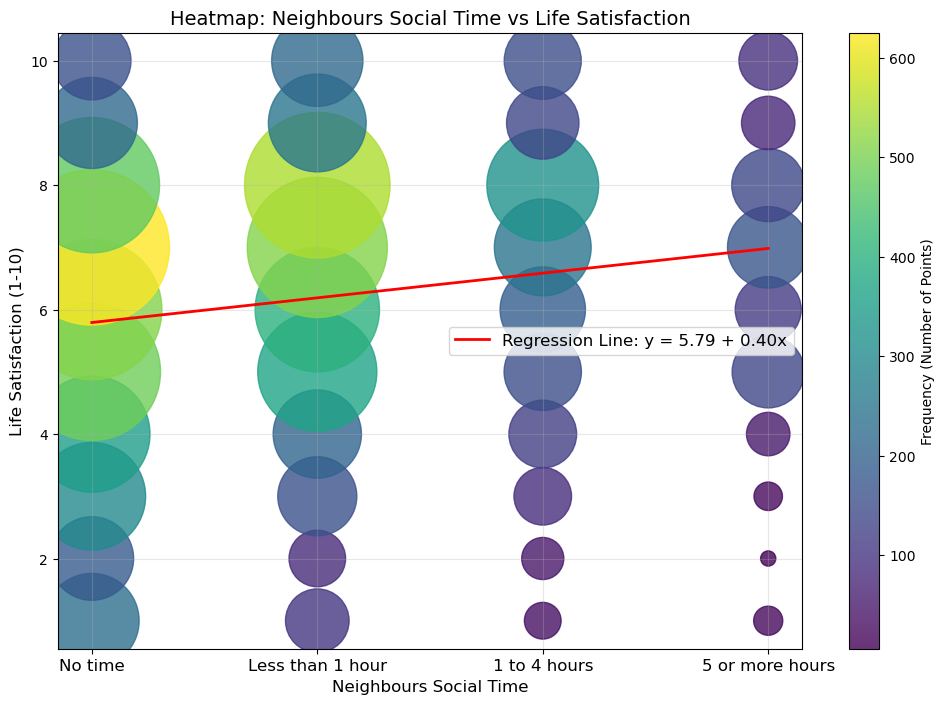

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Prepare data for plotting
x = data_cleaned['CONNECTION_social_time_neighbours_p7d_grouped']
y = data_cleaned['WELLNESS_life_satisfaction']

# Define category labels for X-axis
category_labels = {
    0: "No time",
    1: "Less than 1 hour",
    2: "1 to 4 hours",
    3: "5 or more hours"
}

# Count occurrences of each (x, y) pair
data_counts = data_cleaned.groupby(['CONNECTION_social_time_neighbours_p7d_grouped', 'WELLNESS_life_satisfaction']).size().reset_index(name='count')

# Generate regression line values
x_line = np.linspace(x.min(), x.max(), 100)  # Generate x values for the regression line
y_line = beta_0_hat + beta_1_hat * x_line  # Compute corresponding y values using the regression equation

# Plot the scatter plot as a heatmap
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    data_counts['CONNECTION_social_time_neighbours_p7d_grouped'],
    data_counts['WELLNESS_life_satisfaction'],
    s=data_counts['count'] * 20,  # Adjust point size based on the count
    c=data_counts['count'],       # Color intensity based on the count
    cmap='viridis',               # Colormap for the heatmap effect
    alpha=0.8                     # Transparency of the points
)

# Plot the regression line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regression Line: y = {beta_0_hat:.2f} + {beta_1_hat:.2f}x')

# Add colorbar to indicate density
plt.colorbar(scatter, label='Frequency (Number of Points)')

# Customize X-axis ticks and labels
plt.xticks(ticks=list(category_labels.keys()), labels=list(category_labels.values()), fontsize=12)

# Add labels, title, and legend
plt.title("Heatmap: Neighbours Social Time vs Life Satisfaction", fontsize=14)
plt.xlabel("Neighbours Social Time", fontsize=12)
plt.ylabel("Life Satisfaction (1-10)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.show()
